# CC

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav

La quantification est sur 16 bits.
Durée du fichier : 0.734 secondes


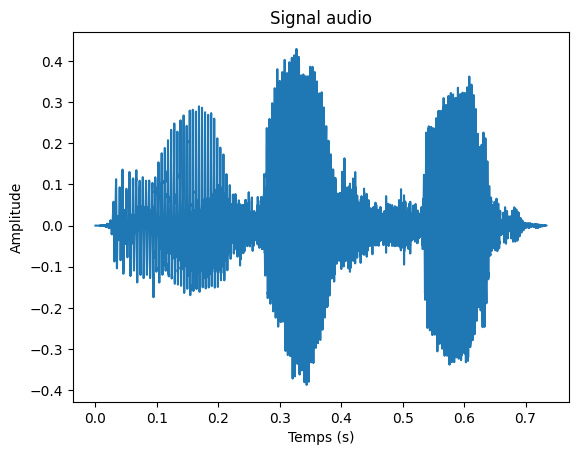

In [2]:

fs, signal = wav.read('assets/lerecit.wav')

quantification = signal.dtype.itemsize * 8

print("La quantification est sur", quantification, "bits.")

# Convertir les données d'entiers à réels flottants (quantification est sur 16 bits)
signal = signal / 32767.0  # 32767 est la valeur maximale d'un entier 16 bits

# Calculer la durée du fichier
duree = len(signal) / fs
print("Durée du fichier :", duree, "secondes")

temps = np.arange(0, len(signal)) / fs

plt.plot(temps, signal)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Signal audio")
plt.show()


L'image est composée de 400 lignes, 600 colonnes et <class 'numpy.uint8'> composantes


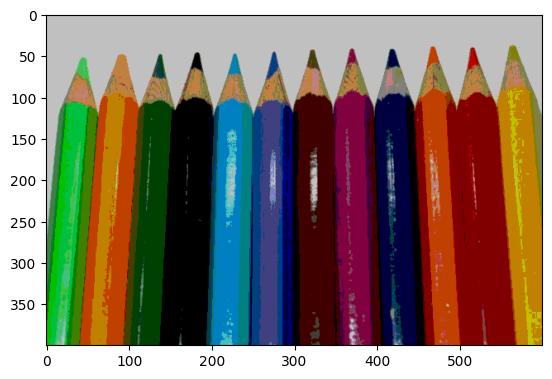

In [3]:
image = plt.imread('assets/crayons.jpg')

def get_image_info(image):
    nb_lignes, nb_colonnes, nb_composantes = image.shape
    type_composante = type(image[0, 0, 0])
    return nb_lignes, nb_colonnes, type_composante

print("L'image est composée de", get_image_info(image)[0], "lignes,", get_image_info(image)[1], "colonnes et", get_image_info(image)[2], "composantes")

def sous_quantification_image(image, n):
    mask = (2 ** n - 1) << (8 - n)
    r, g, b = np.rollaxis(image, axis=-1)
    r = np.bitwise_and(r, mask).astype(np.uint8)
    g = np.bitwise_and(g, mask).astype(np.uint8)
    b = np.bitwise_and(b, mask).astype(np.uint8)
    image_quant = np.dstack((r, g, b))
    return image_quant

plt.imshow(sous_quantification_image(image, 2))
plt.savefig('assets/crayons_2bits.jpg')
